In [6]:
!pip install opencv-python-headless


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


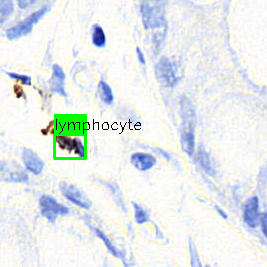

In [7]:
from google.colab.patches import cv2_imshow
import cv2

image_path = "/content/image_0"

image = cv2.imread(image_path + '.png')

class_list = ['lymphocyte']
colors = [(0, 255, 0), (0, 255, 255)]

height, width, _ = image.shape

T=[]
with open(image_path + '.txt', "r") as file1:
    for line in file1.readlines():
        split = line.split(" ")

        # getting the class id
        class_id = int(split[0])
        color = colors[class_id]
        clazz = class_list[class_id]

        # getting the xywh bounding box coordinates
        x, y, w, h = float(split[1]), float(split[2]), float(split[3]), float(split[4])

        # re-scaling xywh to the image size
        box = [int((x - 0.5*w)* width), int((y - 0.5*h) * height), int(w*width), int(h*height)]
        cv2.rectangle(image, box, color, 2)
        cv2.rectangle(image, (box[0], box[1] - 20), (box[0] + box[2], box[1]), color, -1)
        cv2.putText(image, class_list[class_id], (box[0], box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,0))



# Show the image using cv2_imshow() function instead of cv2.imshow()
cv2_imshow(image)


# Training YOLOv5 custom dataset with ease

Check the full explanation on medium:

https://medium.com/mlearning-ai/training-yolov5-custom-dataset-with-ease-e4f6272148ad

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init() 

YOLOv5 🚀 v7.0-108-g4db6757 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


In [14]:
%cd ..

/content


In [15]:
import shutil
import os, sys

zip_file = "archive.zip"

if os.path.isfile(zip_file):
  shutil.unpack_archive(zip_file, "data")
else:
  print(zip_file + " not found")

In [17]:
import os, shutil, random

# preparing the folder structure

full_data_path = 'data/obj/'
extension_allowed = '.png'
split_percentage = 90

images_path = 'data/images/'
if os.path.exists(images_path):
    shutil.rmtree(images_path)
os.mkdir(images_path)
    
labels_path = 'data/labels/'
if os.path.exists(labels_path):
    shutil.rmtree(labels_path)
os.mkdir(labels_path)
    
training_images_path = images_path + 'training/'
validation_images_path = images_path + 'validation/'
training_labels_path = labels_path + 'training/'
validation_labels_path = labels_path +'validation/'
    
os.mkdir(training_images_path)
os.mkdir(validation_images_path)
os.mkdir(training_labels_path)
os.mkdir(validation_labels_path)

files = []

ext_len = len(extension_allowed)

for r, d, f in os.walk(full_data_path):
    for file in f:
        if file.endswith(extension_allowed):
            strip = file[0:len(file) - ext_len]      
            files.append(strip)

random.shuffle(files)

size = len(files)                   

split = int(split_percentage * size / 100)

print("copying training data")
for i in range(split):
    strip = files[i]
                         
    image_file = strip + extension_allowed
    src_image = full_data_path + image_file
    shutil.copy(src_image, training_images_path) 
                         
    annotation_file = strip + '.txt'
    src_label = full_data_path + annotation_file
    shutil.copy(src_label, training_labels_path) 

print("copying validation data")
for i in range(split, size):
    strip = files[i]
                         
    image_file = strip + extension_allowed
    src_image = full_data_path + image_file
    shutil.copy(src_image, validation_images_path) 
                         
    annotation_file = strip + '.txt'
    src_label = full_data_path + annotation_file
    shutil.copy(src_label, validation_labels_path) 

print("finished")

copying training data
copying validation data
finished


In [18]:
f = open("dataset.yaml", "a")

f.write("train: ../data/images/training/\n")
f.write("val: ../data/images/validation/\n")
f.write("nc: 1\n")
f.write("names: ['lymphocyte']\n")
f.close()

In [19]:
%cd yolov5
!python train.py --img 640 --batch 16 --epochs 5 --data ../dataset.yaml --weights yolov5s.pt

/content/yolov5
train: weights=yolov5s.pt, cfg=, data=../dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-108-g4db6757 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv

In [26]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.4 --source /content/7.png

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/7.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-108-g4db6757 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/7.png: 640x640 (no detections), 12.6ms
Speed: 0.5ms pre-process, 12.6ms inference, 0.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


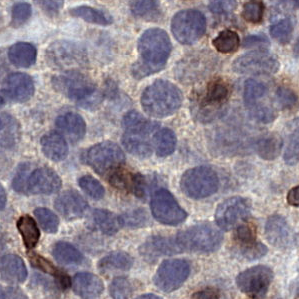

In [27]:
from IPython.display import display
from PIL import Image

image_path = "runs/detect/exp4/7.png"
display(Image.open(image_path))

You can download the source original images from the author site at who retain the rights on the image: https://www.pexels.com/photo/a-group-of-skaters-with-their-skateboards-on-the-sidewalk-6337382/